In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load the dataset
file_path = 'mushroom.csv'
mushroom_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(mushroom_data.head())


   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

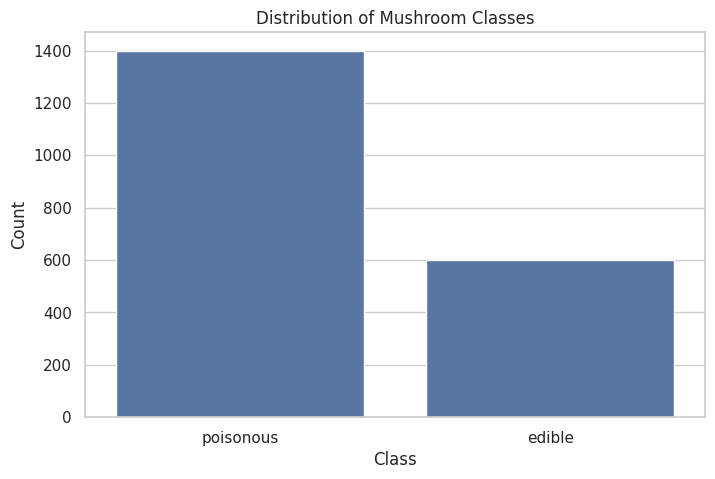

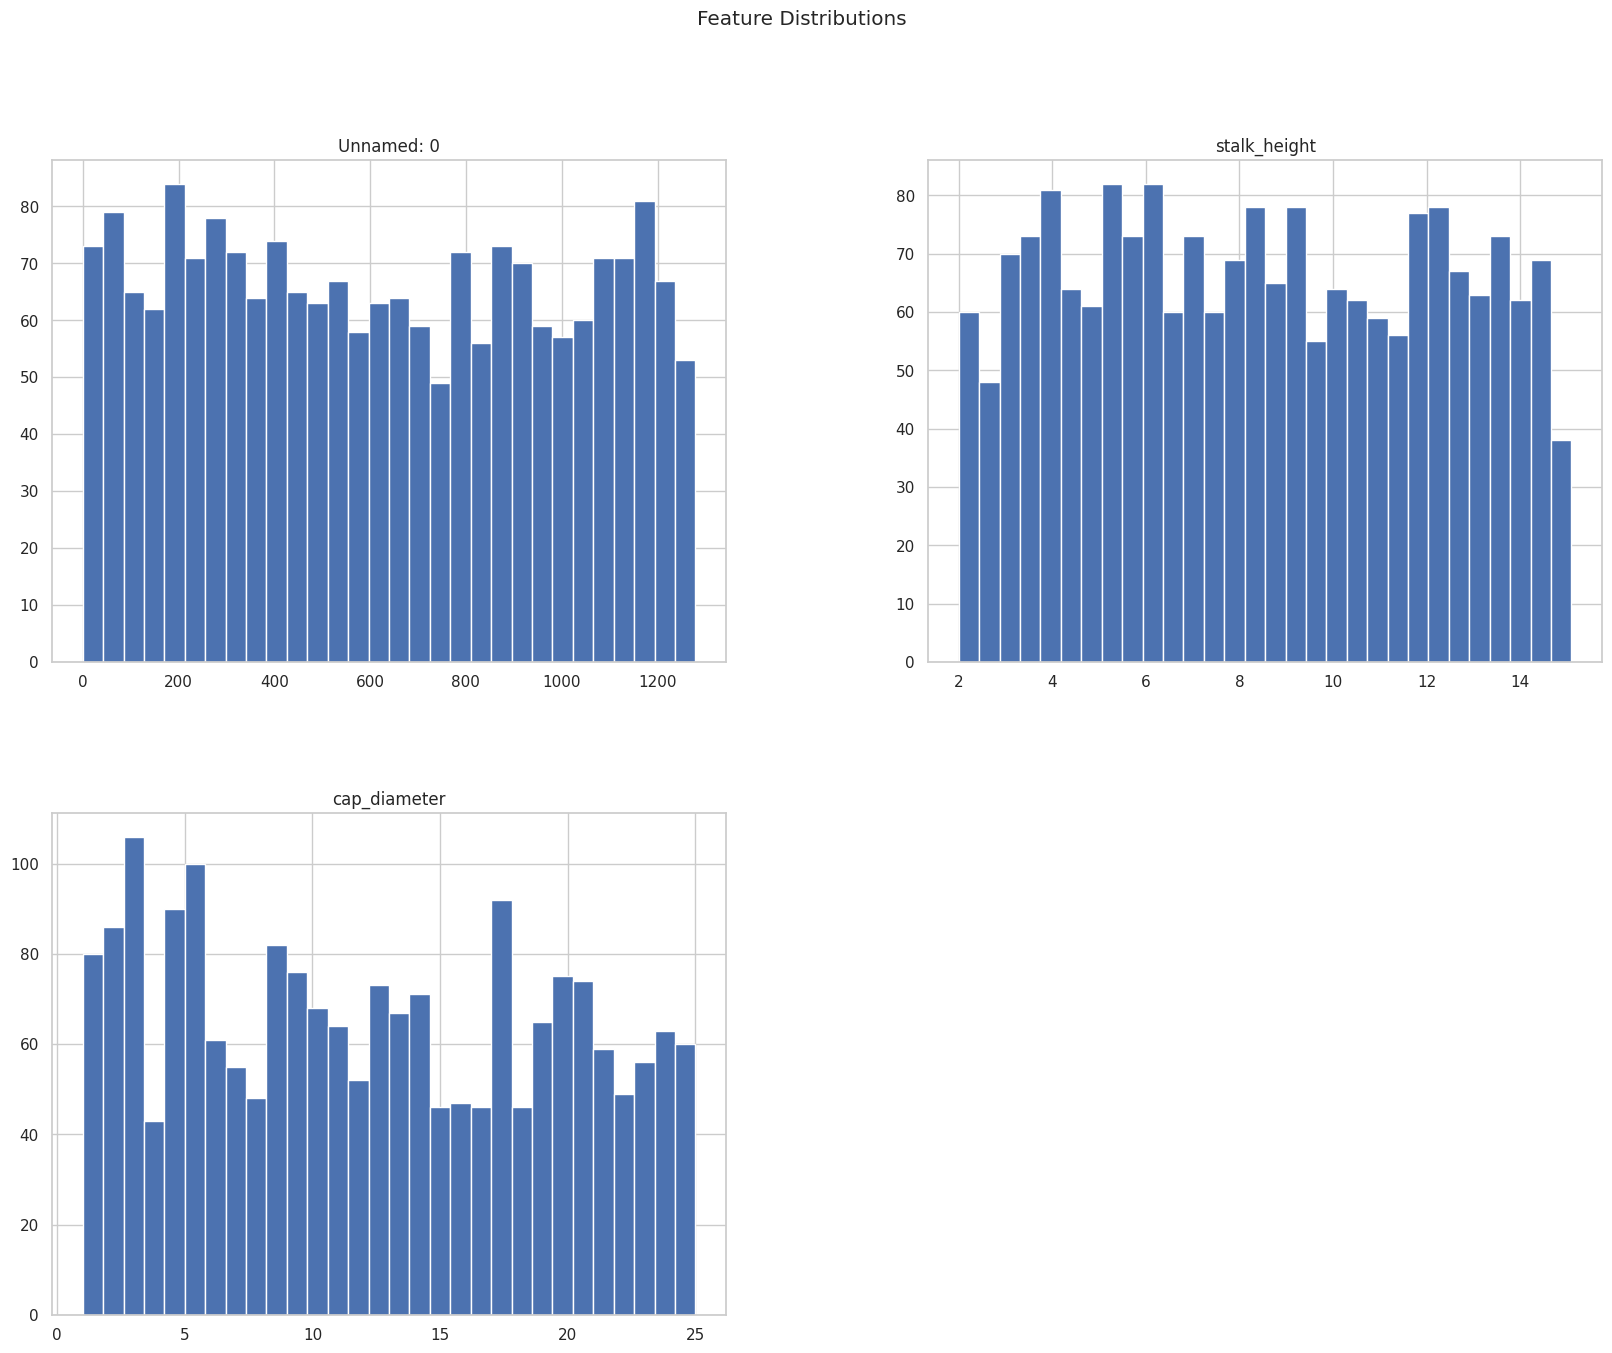

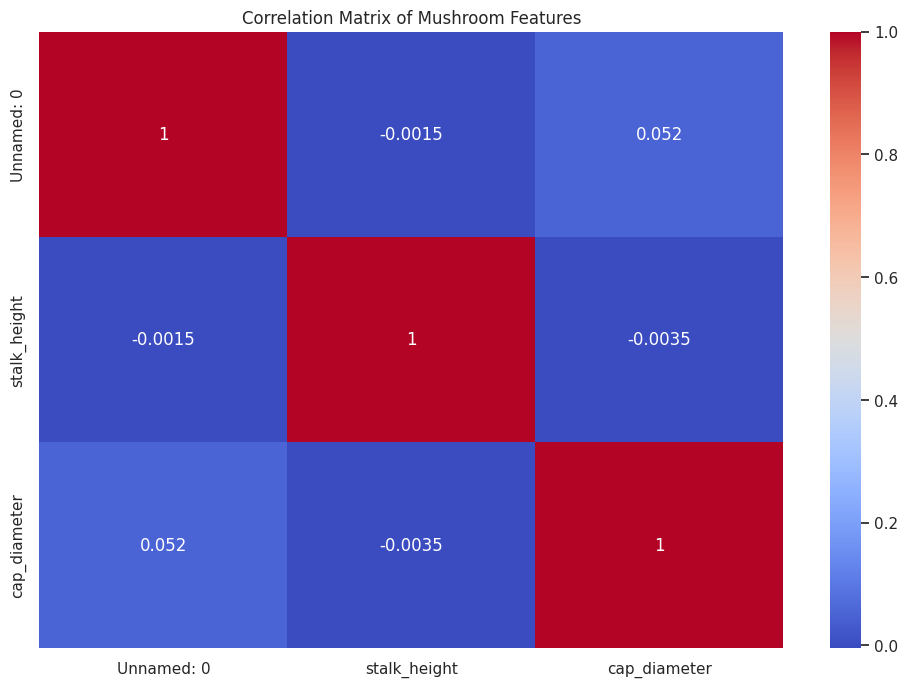

In [3]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the distribution of the target variable 'class'
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=mushroom_data)
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Plot histograms for each feature
mushroom_data.hist(bins=30, figsize=(20, 15))
plt.suptitle("Feature Distributions")
plt.show()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = mushroom_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Mushroom Features')
plt.show()


In [4]:
# Encode categorical variables
label_encoders = {}
mushroom_data_encoded = mushroom_data.copy()

for column in mushroom_data.columns:
    if mushroom_data[column].dtype == 'object':
        le = LabelEncoder()
        mushroom_data_encoded[column] = le.fit_transform(mushroom_data[column])
        label_encoders[column] = le

# Display the first few rows of the encoded dataset
print(mushroom_data_encoded.head())


   Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0        1167          4            2          7        0     1   
1        1037          4            0          6        0     1   
2         309          3            1          5        1     4   
3         282          0            2          4        1     3   
4         820          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3         

In [5]:
# Separate features and target variable
X = mushroom_data_encoded.drop(columns=['class', 'Unnamed: 0'])
y = mushroom_data_encoded['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1600, 24) (400, 24) (1600,) (400,)


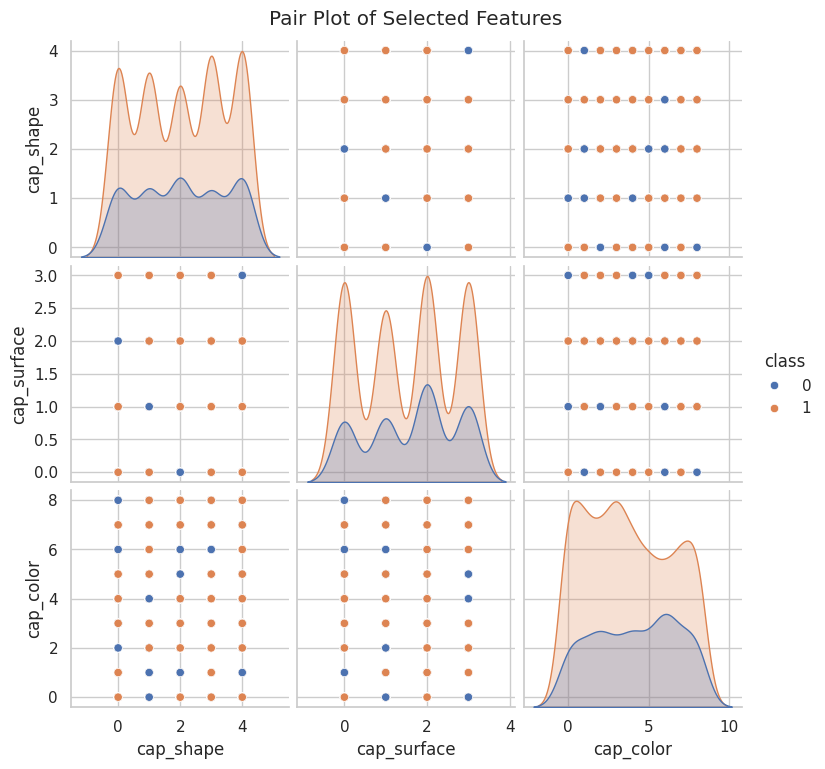

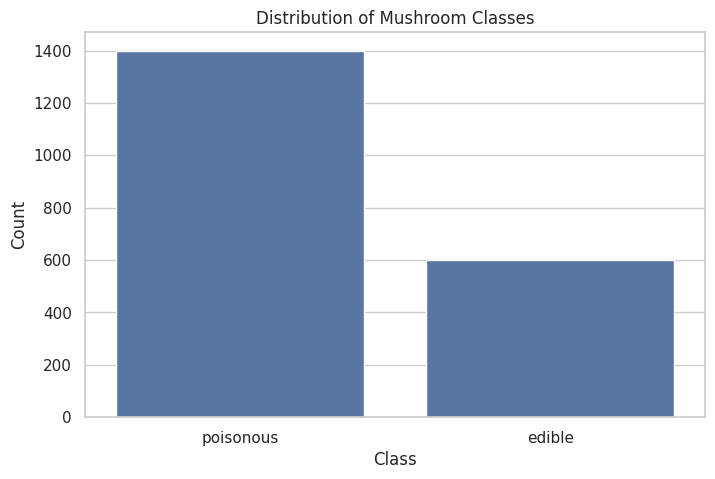

In [6]:
# Plot scatter plots for a subset of features
sns.pairplot(mushroom_data_encoded[['cap_shape', 'cap_surface', 'cap_color', 'class']], hue='class')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

# Plot the distribution of the target variable 'class'
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=mushroom_data)
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [7]:
# Implement a basic SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm_classifier.predict(X_test)


In [8]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.6675
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Experiment with different SVM hyperparameters
svm_classifier_rbf = SVC(kernel='rbf', random_state=42)
svm_classifier_rbf.fit(X_train, y_train)
y_pred_rbf = svm_classifier_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
report_rbf = classification_report(y_test, y_pred_rbf)

print(f"Accuracy with RBF Kernel: {accuracy_rbf}")
print("Classification Report with RBF Kernel:")
print(report_rbf)


Accuracy with RBF Kernel: 0.6675
Classification Report with RBF Kernel:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.885
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



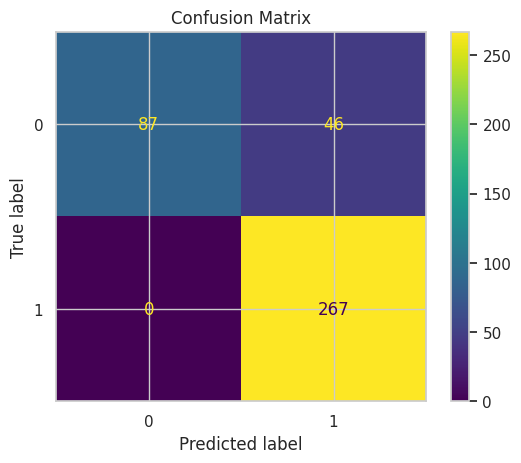

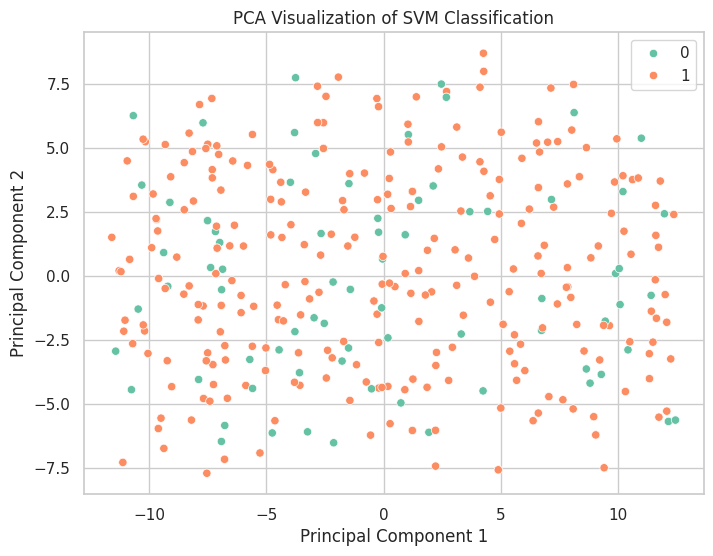


Kernel Comparison:
linear Kernel Accuracy: 0.6675
poly Kernel Accuracy: 0.6925
rbf Kernel Accuracy: 0.6675


In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("mushroom.csv")

# Encode categorical columns
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Features and target
X = df.drop(columns=['class', 'Unnamed: 0'], errors='ignore')
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# Task 6: GridSearchCV
# ----------------------------
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Best model and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ----------------------------
# Task 5: PCA Visualization
# ----------------------------
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette="Set2")
plt.title("PCA Visualization of SVM Classification")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# ----------------------------
# Task 7: Kernel Comparison
# ----------------------------
kernels = ['linear', 'poly', 'rbf']
results = []

for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results.append((kernel, acc))

print("\nKernel Comparison:")
for kernel, acc in results:
    print(f"{kernel} Kernel Accuracy: {acc:.4f}")
